In [1]:
import sqlite3
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import string

#NLTK
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [2]:
neg = pd.read_csv('pos_review.csv')
neg

,Review
0,So useful app! I wish could written English.
1,Was really useful I visiting DC!
2,useful!
3,"Epitome success! If used correctly, app's algo..."
4,I find useful! I always buy tickets gametime.
...,...
17588,Rec'd response admin. Fixed issues. Repurchase...
17589,"Thanks lot excellent map ""2gis"". I love it, li..."
17590,"This gets worse every update. I years fast, fe..."
17591,Best thing EVER!! Im love app. I look forward ...


In [3]:
#with pd.ExcelWriter('berita kompas.xlsx') as writer:  
 #       df.to_excel(writer, sheet_name='berita kompas')

In [4]:
def low(text):
        return text.lower()

def removenumber(text):
        return  re.sub(r"\d+", "", text)

def removepunct(text):
        return text.translate(str.maketrans("","",string.punctuation))

def removewhitespace(text):
        return text.strip()
    
def remove_url(text):
        return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b' , '', text, flags=re.MULTILINE)

def tokenizekalimat(text):
        return sent_tokenize(text)
    
def tokenizekata(text):
        return word_tokenize(text)
    
def remove_special_char(text):
        text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
        text = text.encode('ascii', 'replace').decode('ascii')
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split()) 
        
def remove_urlless(text):
        return text.replace("http://", " ").replace("https://", " ")             
    
def stopwordss(kalimat):
    list_baru = ['would','get','im','many','also','even','time','u','like','google','play','great','good','make','want','go','thing']
    list_stopwords = stopwords.words('english') #list
    list_stopwords.append(list_baru) #list
    for i in list_baru:
         list_stopwords.append(i)
    return ' '.join([w for w in kalimat if not w in list_stopwords])
    
def stemming(text):
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        return stemmer.stem(text)


In [5]:
text = neg['Review'].apply(low)
text = text.apply(remove_url)
text = text.apply(removenumber)
text = text.apply(removepunct)
text = text.apply(remove_special_char)
text = text.apply(remove_urlless)
text = text.apply(tokenizekata)
text1 = text.apply(stopwordss)

text1

0                    useful app wish could written english
1                                really useful visiting dc
2                                                   useful
3        epitome success used correctly apps algorithms...
4                  find useful always buy tickets gametime
                               ...                        
17588    recd response admin fixed issues repurchased i...
17589    thanks lot excellent map gis love much working...
17590    gets worse every update years fast features wo...
17591    best ever love app look forward talking bunch ...
17592    dude know bible holy scripture honest annoying...
Name: Review, Length: 17593, dtype: object

In [6]:
type(text1)

pandas.core.series.Series

In [7]:
df2 = DataFrame(text1)
df2 #dataframe bersih


,Review
0,useful app wish could written english
1,really useful visiting dc
2,useful
3,epitome success used correctly apps algorithms...
4,find useful always buy tickets gametime
...,...
17588,recd response admin fixed issues repurchased i...
17589,thanks lot excellent map gis love much working...
17590,gets worse every update years fast features wo...
17591,best ever love app look forward talking bunch ...


In [8]:
text1 = ' '.join(text1)

In [9]:
text1

'useful app wish could written english really useful visiting dc useful epitome success used correctly apps algorithms word scope guarantee rapid increase vocabulary record find useful always buy tickets gametime useful find friends connections updated hope fix useful thank useful fact add food math everything macros grams protein calories fat fiance using useful student really useful tried multiple pdf reading coming across one none could match one useful improves english vocabulary use daily count times quite useful useful helping always find location useful without internet useful balance checks v useful gud useful useful app find useful need kill waiting others using mi found useful turn always setting home screen recents turn vault useful incredibly useful tool useful give decorating ideas useful affordable ideas useful useful seems incorrect line spacing exporting file use meditation relaxing find useful recommend anyone looking biosound therapy useful useful app give stars add s

### Distribusi Frekuensi Kata

In [10]:
import itertools
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [11]:
kata = word_tokenize(text1)
kata

['useful',
 'app',
 'wish',
 'could',
 'written',
 'english',
 'really',
 'useful',
 'visiting',
 'dc',
 'useful',
 'epitome',
 'success',
 'used',
 'correctly',
 'apps',
 'algorithms',
 'word',
 'scope',
 'guarantee',
 'rapid',
 'increase',
 'vocabulary',
 'record',
 'find',
 'useful',
 'always',
 'buy',
 'tickets',
 'gametime',
 'useful',
 'find',
 'friends',
 'connections',
 'updated',
 'hope',
 'fix',
 'useful',
 'thank',
 'useful',
 'fact',
 'add',
 'food',
 'math',
 'everything',
 'macros',
 'grams',
 'protein',
 'calories',
 'fat',
 'fiance',
 'using',
 'useful',
 'student',
 'really',
 'useful',
 'tried',
 'multiple',
 'pdf',
 'reading',
 'coming',
 'across',
 'one',
 'none',
 'could',
 'match',
 'one',
 'useful',
 'improves',
 'english',
 'vocabulary',
 'use',
 'daily',
 'count',
 'times',
 'quite',
 'useful',
 'useful',
 'helping',
 'always',
 'find',
 'location',
 'useful',
 'without',
 'internet',
 'useful',
 'balance',
 'checks',
 'v',
 'useful',
 'gud',
 'useful',
 'usefu

In [12]:
list_baru = ['ive','way','would','get','im','many','also','even','time','u','like','google','play','great','good','make','want','go','thing']
list_stopwords = stopwords.words('english') #list
list_stopwords.append(list_baru) #list

for i in list_baru:
         list_stopwords.append(i)
print(list_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
kata_tanpa_stopwords = [word for word in kata if not word in list_stopwords] 
kata_tanpa_stopwords

['useful',
 'app',
 'wish',
 'could',
 'written',
 'english',
 'really',
 'useful',
 'visiting',
 'dc',
 'useful',
 'epitome',
 'success',
 'used',
 'correctly',
 'apps',
 'algorithms',
 'word',
 'scope',
 'guarantee',
 'rapid',
 'increase',
 'vocabulary',
 'record',
 'find',
 'useful',
 'always',
 'buy',
 'tickets',
 'gametime',
 'useful',
 'find',
 'friends',
 'connections',
 'updated',
 'hope',
 'fix',
 'useful',
 'thank',
 'useful',
 'fact',
 'add',
 'food',
 'math',
 'everything',
 'macros',
 'grams',
 'protein',
 'calories',
 'fat',
 'fiance',
 'using',
 'useful',
 'student',
 'really',
 'useful',
 'tried',
 'multiple',
 'pdf',
 'reading',
 'coming',
 'across',
 'one',
 'none',
 'could',
 'match',
 'one',
 'useful',
 'improves',
 'english',
 'vocabulary',
 'use',
 'daily',
 'count',
 'times',
 'quite',
 'useful',
 'useful',
 'helping',
 'always',
 'find',
 'location',
 'useful',
 'without',
 'internet',
 'useful',
 'balance',
 'checks',
 'v',
 'useful',
 'gud',
 'useful',
 'usefu

In [14]:
fqdist = FreqDist(kata_tanpa_stopwords)
fqdist

FreqDist({'game': 3375, 'love': 3055, 'app': 2835, 'really': 1829, 'easy': 1587, 'best': 1450, 'much': 1345, 'cant': 1210, 'update': 1185, 'phone': 1159, ...})

In [15]:
print(fqdist)

<FreqDist with 18349 samples and 254234 outcomes>


In [16]:
fqdist.most_common(20)

[('game', 3375),
 ('love', 3055),
 ('app', 2835),
 ('really', 1829),
 ('easy', 1587),
 ('best', 1450),
 ('much', 1345),
 ('cant', 1210),
 ('update', 1185),
 ('phone', 1159),
 ('better', 1131),
 ('work', 1102),
 ('new', 1086),
 ('nice', 1062),
 ('ads', 1039),
 ('free', 1034),
 ('please', 1025),
 ('need', 1004),
 ('fun', 983),
 ('could', 875)]

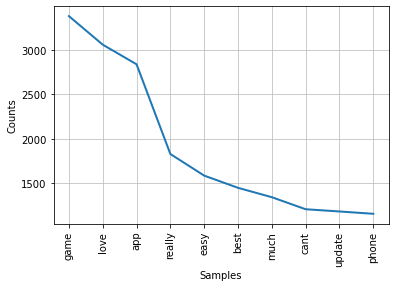

In [17]:
import matplotlib.pyplot as plt
fqdist.plot(10,cumulative=False)
plt.show()

### Distribusi Frekuensi jumlah huruf pada suatu data

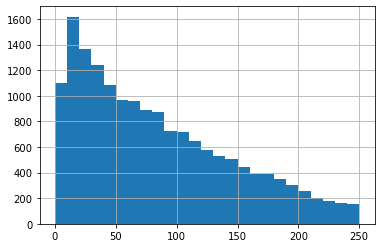

In [18]:
bin_range = np.arange(0, 260, 10)

df2['Review'].str.len().hist(bins=bin_range)
plt.show()

### Distribusi Frekuensi Jumlah kata per Data

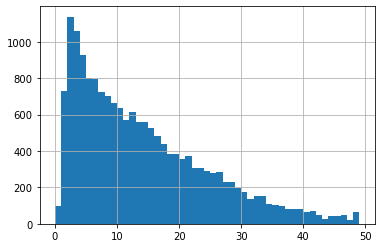

In [19]:
bin_range = np.arange(0, 50)
df2['Review'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()
 

### Distribusi Frekuensi Panjang Kata Rata-Rata Pada Data

C:\Users\Fitrie Ratnasari\anaconda3\envs\py3.8\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Fitrie Ratnasari\anaconda3\envs\py3.8\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


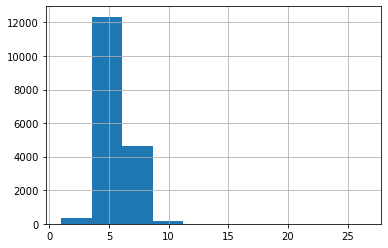

In [20]:
df2['Review'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

### Distribusi N-Gram

In [21]:
import nltk
result = pd.Series(nltk.ngrams(kata_tanpa_stopwords, 2)).value_counts()[:25]
result

(easy, use)            328
(love, app)            327
(love, game)           316
(please, fix)          285
(full, review)         262
(love, love)           202
(much, better)         149
(user, friendly)       120
(latest, update)       119
(fun, game)            105
(highly, recommend)    102
(free, version)        101
(wish, could)           99
(give, stars)           97
(app, love)             92
(game, love)            90
(new, update)           87
(keep, work)            86
(keep, track)           85
(best, game)            84
(game, really)          81
(works, well)           80
(playing, game)         78
(absolutely, love)      77
(last, update)          76
dtype: int64

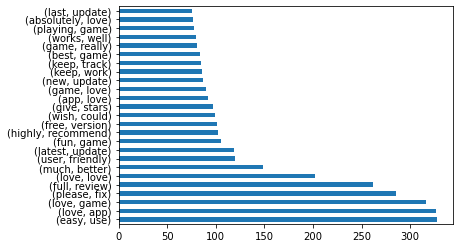

In [22]:
import matplotlib.pyplot as plt
result.plot(kind='barh')
plt.show()

In [23]:
### Disatukan kembali 

In [24]:
fin_text = ' '.join(kata_tanpa_stopwords)
fin_text

'useful app wish could written english really useful visiting dc useful epitome success used correctly apps algorithms word scope guarantee rapid increase vocabulary record find useful always buy tickets gametime useful find friends connections updated hope fix useful thank useful fact add food math everything macros grams protein calories fat fiance using useful student really useful tried multiple pdf reading coming across one none could match one useful improves english vocabulary use daily count times quite useful useful helping always find location useful without internet useful balance checks v useful gud useful useful app find useful need kill waiting others using mi found useful turn always setting home screen recents turn vault useful incredibly useful tool useful give decorating ideas useful affordable ideas useful useful seems incorrect line spacing exporting file use meditation relaxing find useful recommend anyone looking biosound therapy useful useful app give stars add s

## WordCloud

In [25]:
# import package 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
print ('Wordcloud is installed and imported!')


Wordcloud is installed and imported!


In [26]:
list_stopwords = stopwords.words('english')

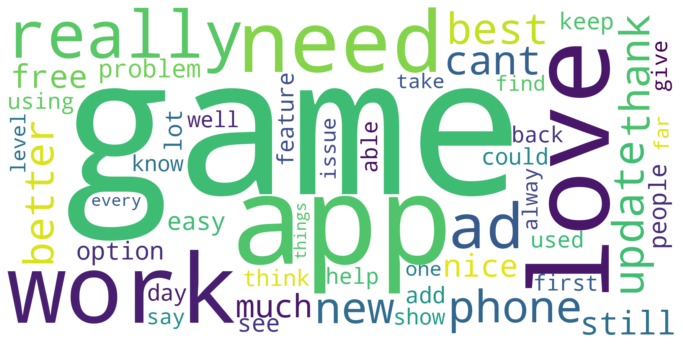

In [27]:
wc = WordCloud(width=1600, height=800, background_color="white", max_words=50, stopwords=list_stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(fin_text)

# show
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plt.title('Keyword for Negative Sentiment \n', fontsize= 20)
plt.show()